# Contents
- [Data prep](#data-preparation)
  - [Orders all](#orders)
  - [Process](#process-data)
  - [Campaign](#campaign-data)
  - [Interne study's](#intern-studys)
- [Data Cleaning](#data-cleaning)
  - [Orders](#cleaning-orders)
  - [Campaign](#cleaning-campaign)
  - [Internal](#cleaning-internal)
  - [Process](#cleaning-process)
- [Merging](#merging)
  - [Ship modes](#ship-modes)
- [KPI's](#kpis)
  - [KPI #1](#kpi-internal)
  - [KPI #2](#kpi-external)
  - [KPI #3](#kpi-totallead)
  - [Warehouse + Shipping](#days-between-warehouse-and-shipping)
- [Evaluation Days](#evaluation-on-day)

## Data preparation

Import needed libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Orders  
Dataframe for first sheet in the csv file: The orders.
- first line in dataset is empty.    
- can use the index from the table as the index we use 

In [2]:
df_orders = pd.read_csv("data/Muesli Project raw data - Orders.csv", header=1, index_col = 0)
df_orders.head()

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
Index,,,,,,,,,,,,,,,,,,
27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


Using the given index from our table, and use it here. Sort it.

In [3]:
df_orders.sort_index(inplace=True)
df_orders.head()

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
Index,,,,,,,,,,,,,,,,,,
1,CA-2019-152156,8/11/2019,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420.0,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.9600,2,0.00,41.9136
2,CA-2019-152156,8/11/2019,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420.0,South,Toasted Muesli,With Nuts,FUR-CH-10000454,731.9400,3,0.00,219.5820
3,CA-2019-138688,12/6/2019,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,90036.0,West,Power Muesli,No Taste All Power,OFF-LA-10000240,14.6200,2,0.00,6.8714
4,US-2018-108966,11/10/2018,Standard Class,SO-20335,Sean O'Donnell,Email,United States,Fort Lauderdale,Florida,33311.0,South,Toasted Muesli,Sweetened,FUR-TA-10000577,957.5775,5,0.45,-383.0310
5,US-2018-108966,11/10/2018,Standard Class,SO-20335,Sean O'Donnell,Email,United States,Fort Lauderdale,Florida,33311.0,South,Power Muesli,Steel Cut,OFF-ST-10000760,22.3680,2,0.20,2.5164


Pythonic way of headers.

In [4]:
df_orders.columns = (df_orders.columns.str.lower()
                    .str.replace(' ','_')
                    .str.replace('-','_')
                    .str.replace('/','_')
                    )
df_orders.sample(5)

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
Index,,,,,,,,,,,,,,,,,,
2693,US-2019-144211,28/8/2019,Standard Class,CS-12130,Chad Sievert,Email,United States,Englewood,Colorado,80112.0,West,Special Projects Muesil,Only Oats,TEC-PH-10002890,108.576,3,0.2,8.1432
1226,CA-2019-126004,4/12/2019,First Class,BM-11140,Becky Martin,Email,United States,New York City,New York,10024.0,East,Power Muesli,Nuts and more,OFF-PA-10001685,40.560,4,0.0,19.8744
3187,CA-2017-123498,7/11/2017,First Class,TC-20980,Tamara Chand,Sales,United States,Houston,Texas,77041.0,Central,Power Muesli,Power Clean Fibre Boost,OFF-EN-10004773,74.352,3,0.2,26.9526
9138,CA-2017-123400,2/2/2017,Standard Class,EB-13930,Eric Barreto,Email,United States,Saint Petersburg,Florida,33710.0,South,Power Muesli,Super Fibre Boost,OFF-BI-10000666,18.336,2,0.7,-12.2240
1528,CA-2019-122392,22/7/2019,Standard Class,CJ-12010,Caroline Jumper,Email,United States,Allentown,Pennsylvania,18103.0,East,Toasted Muesli,With Fruit and Nuts,FUR-FU-10002456,11.648,2,0.2,3.3488


Check for missing values and understanding the dataset.

In [5]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        9994 non-null   object 
 1   order_date      9994 non-null   object 
 2   ship_mode       9994 non-null   object 
 3   customer_id     9994 non-null   object 
 4   customer_name   9994 non-null   object 
 5   origin_channel  9994 non-null   object 
 6   country_region  9994 non-null   object 
 7   city            9994 non-null   object 
 8   state           9994 non-null   object 
 9   postal_code     9983 non-null   float64
 10  region          9994 non-null   object 
 11  category        9994 non-null   object 
 12  sub_category    9994 non-null   object 
 13  product_id      9994 non-null   object 
 14  sales           9994 non-null   float64
 15  quantity        9994 non-null   int64  
 16  discount        9994 non-null   float64
 17  profit          9994 non-null   f

We need a datetime-format instead of strings to operate on this columns.

In [6]:
#You can give a format in which your str-date is that pandas can parse more easily
df_orders["order_date"] = pd.to_datetime(df_orders["order_date"],format='%d/%m/%Y')

We'll not work on postal_code. So we keep the missing value in this column.

##### Process Data
Create dataframe for our detailed order process, where we have the import `on_truck_scan_date`
- This table has other names for the ship mode. We keep it in mind for observations.  

Bring the column names in shape.

In [9]:
df_order_process = pd.read_csv("data/Muesli Project raw data - Order Process Data.csv")
#new_col = []
#for rows in df_order_process.columns:
#    new_col.append(rows.lower().replace(" ", "_"))
#df_order_process.columns = new_col
#df_order_process

#should be the pandas way, because we don't want to use a slow loop
df_order_process.columns = (df_order_process.columns.str.lower()
                    .str.replace(' ','_')
                    .str.replace('-','_')
                    .str.replace('/','_')
                    )

df_order_process.sample(5)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
789,1100,CA-2019-107216,14/6/2019,17/06/2019,Express
5739,2056,CA-2020-120376,22/12/2020,24/12/2020,Express
2580,8361,CA-2020-147207,2/1/2020,08/01/2020,Standard Processing
1812,8273,CA-2019-139549,20/10/2019,30/10/2019,Standard Processing
1072,4444,US-2019-111290,22/7/2019,29/07/2019,Standard Processing


Set the dates in the right format.

In [ ]:
#You'll get hints that the process take longer if we don't use 'dayfirst'.
df_order_process["order_date"] = pd.to_datetime(df_order_process["order_date"],dayfirst=True)
df_order_process["on_truck_scan_date"] = pd.to_datetime(df_order_process["on_truck_scan_date"],dayfirst=True)
df_order_process.info()

##### Campaign Data
Read data from our campaign, where we can get more infomation about the arrival date. 

In [11]:
df_campaign_data = pd.read_csv("data/Muesli Project raw data - Campaign Data.csv")

Clean up column labels and set date to the correct format.

In [ ]:
df_campaign_data.columns = (df_campaign_data.columns.str.lower()
                    .str.replace(' ','_')
                    .str.replace('-','_')
                    .str.replace('/','_')
                    )

df_orders

df_campaign_data["arrival_scan_date"] = pd.to_datetime(df_campaign_data["arrival_scan_date"],format='%d/%m/%Y')

df_campaign_data.info()

##### Intern studies
Read in the data from our internal study. There we can observe the duration of an order in the warehouse.   
Adjusted labels and put two columns with date in the correct format. All at once!

In [ ]:
df_intern_data_study = pd.read_csv("data/Muesli Project raw data - InternData Study.csv")

df_intern_data_study.columns = (df_intern_data_study.columns.str.lower()
                    .str.replace(' ','_')
                    .str.replace('-','_')
                    .str.replace('/','_')
                    )

df_orders
df_intern_data_study["ready_to_ship_date"] = pd.to_datetime(df_intern_data_study["ready_to_ship_date"],format='%d/%m/%Y')
df_intern_data_study["pickup_date"] = pd.to_datetime(df_intern_data_study["pickup_date"],format='%d/%m/%Y')

df_intern_data_study.info()
df_intern_data_study.sample(5)

All collected data in one view.

In [ ]:
display(df_orders.sample(5),
        df_order_process.sample(5),
        df_campaign_data.sample(5),
        df_intern_data_study.sample(5)
        )

## Data Cleaning
##### Cleaning Orders
Delete columns in Orders that are not needed. 
We only need columns with information about the order identifier and shipping modulations.  

In [15]:
df_orders.drop(columns=['customer_name', 'origin_channel', 'country_region', 'city', 'state', 'postal_code', 'region', 'category', 'sub_category', 'product_id',
    'sales', 'quantity', 'discount', 'profit'], inplace= True)
df_orders.head(1)

,order_id,order_date,ship_mode,customer_id
Index,,,,
1,CA-2019-152156,2019-11-08,Second Class,CG-12520


We have to clean the duplicates from the Orders table. For this step we count how many orders are in the table if we drop all duplicated rows, and how many from this `order_id`'s are unique. If these numbers match all orders can be handled as one order.

In [16]:
display(
    df_orders.drop_duplicates().order_id.count(),
    df_orders.order_id.unique().size
        )
        

5009

5009

In [17]:
df_orders.drop_duplicates(inplace=True)
df_orders.reset_index(inplace=True,drop=True)

##### Cleaning Campaign
Dropping names because they are not relevant for shipping.  
There are no duplicates in the campaign data, so we can continue to work this way.

In [18]:
df_campaign_data.drop(columns='customer_name',inplace=True)
display(
    df_campaign_data.count(),
    df_campaign_data.order_id.unique().size
)


order_id             333
arrival_scan_date    333
dtype: int64

333

##### Cleaning Internal
There are duplicates in the order_id's. We checked if the lines are always equal.
If there is no doubled `order_id` after the drop of duplicates, the same order which is ready to ship get picked up with the same transport.

In [19]:
display(
    df_intern_data_study.drop_duplicates().order_id.count(),
    df_intern_data_study.order_id.unique().size
        )

204

204


Since all order_id's ready_to_ship_dat and pickup_date are identical, the duplicated lines can be deleted.

In [20]:
df_intern_data_study.drop_duplicates(inplace=True)
df_intern_data_study.reset_index(inplace =True,drop=True)

##### Cleaning Process
Same for the process table. We proof if there is no id from the rows, and afterwards the rows are identical. Then we can drop the row_id column.

In [21]:
df_order_process.drop(columns='row_id',inplace=True)

In [22]:
display(
    df_order_process.drop_duplicates().order_id.count(),
    df_order_process.order_id.unique().size
        )

3003

3002

We see that one row is different. We have to find the row and the problem.

In [23]:
df_order_process_duplicate = df_order_process.drop_duplicates()
df_order_process_duplicate[df_order_process_duplicate['order_id'].duplicated()]

,order_id,order_date,on_truck_scan_date,ship_mode
4217,CA-2020-101182,2020-09-04,2020-09-08,Express


In [24]:
df_order_process[df_order_process['order_id'] == 'CA-2020-101182']

,order_id,order_date,on_truck_scan_date,ship_mode
4216,CA-2020-101182,2020-09-04,2020-09-07,Express
4217,CA-2020-101182,2020-09-04,2020-09-08,Express


Since 2020-09-08 was a Tuesday and no truck left the warehouse this line doesn't make sence.
We decide to drop this row and go further.

In [25]:
df_order_process.drop([4217],inplace=True)
df_order_process.drop_duplicates(inplace=True)
df_order_process.reset_index(inplace=True,drop=True)

In [26]:
display(df_orders.sample(5),
        df_order_process.sample(5),
        df_campaign_data.sample(5),
        df_intern_data_study.sample(5)
        )

,order_id,order_date,ship_mode,customer_id
4692,US-2020-127292,2020-01-19,Standard Class,RM-19375
3476,CA-2020-123687,2020-05-26,First Class,KC-16675
2357,CA-2017-121573,2017-11-03,Standard Class,SG-20605
3566,CA-2020-150609,2020-04-30,Standard Class,NZ-18565
3844,CA-2018-133242,2018-06-18,Standard Class,KH-16510


,order_id,order_date,on_truck_scan_date,ship_mode
1013,CA-2019-118759,2019-11-14,2019-11-18,Express
2168,US-2020-135230,2020-09-01,2020-09-09,Standard Processing
2150,CA-2020-151008,2020-09-07,2020-09-09,Express
2587,CA-2020-106691,2020-11-06,2020-11-13,Standard Processing
414,CA-2019-122448,2019-06-09,2019-06-19,Standard Processing


,order_id,arrival_scan_date
129,CA-2019-102932,2019-09-30
241,CA-2019-130393,2019-12-09
314,CA-2020-124716,2020-04-06
304,CA-2020-104885,2020-03-16
27,CA-2019-160500,2019-05-14


,order_id,ready_to_ship_date,pickup_date
96,CA-2020-154109,2020-11-11,2020-11-13
197,CA-2020-159506,2020-12-02,2020-12-04
75,US-2020-153948,2020-11-06,2020-11-06
57,CA-2019-154235,2019-09-30,2019-10-02
44,CA-2019-102932,2019-09-23,2019-09-25


## Merging

We want to creat a table with all possible dates in it.
We match our internal study with all of our orders. So we can get the shipping date and the arrival date for the orders we have.  
The next step is that we bring in the campaign data for more information about arrival at the customer.  
Last step ist to get the information about the truck scan date from the detailed intern process.

In [27]:
df_orders_mrg = pd.merge(df_orders, df_intern_data_study, how='left', on=["order_id"])

df_orders_mrg = pd.merge(df_orders_mrg, df_campaign_data, how='left', on=["order_id"])
df_orders_mrg = pd.merge(df_orders_mrg, df_order_process[['order_id','on_truck_scan_date']],how='left',on=['order_id'])

We need to change the dates from a string to a datetime format.

In [28]:
df_orders_mrg['order_day'] = df_orders_mrg['order_date'].dt.weekday
df_orders_mrg['order_dayname'] = df_orders_mrg['order_date'].dt.day_name()
df_orders_mrg['arrival_scan_day'] = df_orders_mrg['arrival_scan_date'].dt.weekday
df_orders_mrg.sample(5)

,order_id,order_date,ship_mode,customer_id,ready_to_ship_date,pickup_date,arrival_scan_date,on_truck_scan_date,order_day,order_dayname,arrival_scan_day
3655,CA-2020-168389,2020-12-11,Standard Class,DV-13045,NaT,NaT,NaT,2020-12-18,4,Friday,NaN
3311,CA-2018-153794,2018-09-11,Standard Class,SB-20290,NaT,NaT,NaT,NaT,1,Tuesday,NaN
1029,CA-2020-155460,2020-04-13,First Class,RW-19630,NaT,NaT,NaT,2020-04-15,0,Monday,NaN
4953,CA-2019-122581,2019-08-21,Standard Class,JK-15370,NaT,NaT,NaT,2019-08-28,2,Wednesday,NaN
3400,US-2019-163461,2019-06-18,First Class,BT-11440,NaT,NaT,NaT,2019-06-21,1,Tuesday,NaN


Check if there is always a `pickup_date` for `on_truck_scan_date`:
Join internally to process, then check how many entries there are for `pickup_date`.

In [29]:

df_process_intern_test = pd.merge(df_order_process,df_intern_data_study,how='left',on=['order_id'])
df_process_intern_test['pickup_date'].count()

204

We created a table with all dates we have from our data. Now it's time to create the KPIs.

##### Ship modes
For our KPIs we need to know if there is a difference in the ship modes, especially in `Second Class` and `Standard Class`.

In [30]:
df_mode_mrg =  pd.merge(df_orders, df_order_process[['order_id','ship_mode']], how='left', on=["order_id"])
df_mode_mrg.dropna(inplace=True)

In [31]:
df_mode_mrg['mode'] = df_mode_mrg.apply(lambda x:True if (
                x['ship_mode_x'] == 'Second Class' and x['ship_mode_y'] == 'Standard Processing') or
                (x['ship_mode_x'] == 'Standard Class' and x['ship_mode_y'] == 'Standard Processing') or
                (x['ship_mode_x'] == 'First Class' and x['ship_mode_y'] == 'Express')
                else False ,axis=1)
df_mode_mrg[df_mode_mrg['mode'] == False]

,order_id,order_date,ship_mode_x,customer_id,ship_mode_y,mode


Since all columns have a `True` in the mode column, `Second Class` and `Standard Class`, are the same as `Standard Processing` and `First Class` is always `Express`

## KPIs
We need to create time spans between the processes. 
-   `interncycle`:  time from receiving the order up to be ready for shipping
-   `btwcycle`:     time between ready in our warehouse up to picked up by the logistic company
-   `externcycle`:  the time the logistic company needs based on our campaign
-   `totallead`:    the time a order needs overall

In [32]:
df_orders_mrg['interncycle'] = df_orders_mrg['ready_to_ship_date'] - df_orders_mrg['order_date']
df_orders_mrg['btwcycle'] = df_orders_mrg['on_truck_scan_date'] - df_orders_mrg['ready_to_ship_date']
df_orders_mrg['externcycle'] = df_orders_mrg['arrival_scan_date'] - df_orders_mrg['on_truck_scan_date']
df_orders_mrg['totallead'] = df_orders_mrg['arrival_scan_date'] - df_orders_mrg['order_date']


##### KPI Internal
The KPI for the internal process. Here we find out how long the Muesli company needs and it is important how we organize us.  
**KPI 1:**  `4.18 days`

In [ ]:
df_kpi_intern = df_orders_mrg[df_orders_mrg['interncycle'].notnull()] 
display(
    print('KPI 1 : '+ str(pd.to_numeric(df_kpi_intern.interncycle.dt.days,downcast='integer').mean().round(2))+ 'days'),
    pd.to_numeric(df_kpi_intern.interncycle.dt.days,downcast='integer').describe()
    )

We want to observe how our internal process is going. Can we hold the 3 days to ship the order?

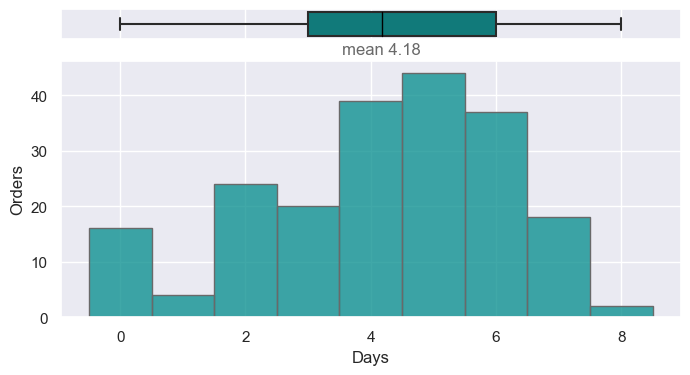

In [34]:
kpi_intern_plot = df_kpi_intern['interncycle']
kpi_intern_plot = pd.to_numeric(kpi_intern_plot.dt.days,downcast='integer')
kpi_intern_plot.reset_index(drop=True,inplace=True)

sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.1,0.85)},figsize=(8,4))

sns.boxplot(x=kpi_intern_plot,ax=ax_box,color='darkcyan',
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-'},
            medianprops={'visible': False},
            )
# adding a text-box at(mean,1)
ax_box.text(kpi_intern_plot.mean(),                                     
            1,
            s='mean {:.2f}'.format(kpi_intern_plot.mean()),
            horizontalalignment='center',
            color='dimgrey'
            )

bins= np.arange(-0.5,9.5,1)
sns.histplot(data=kpi_intern_plot,
            bins=bins,
            color='darkcyan',
            ax=ax_hist,
            edgecolor='dimgray'
            )

            
ax_box.set(xlabel='')
plt.subplots_adjust(hspace=0.15)
plt.xlabel('Days')
plt.ylabel('Orders')
plt.show()

We split up the shippings in Express and Standard.

In [35]:
s_kpi_intern_std = pd.concat([df_kpi_intern[df_kpi_intern['ship_mode'] == 'Second Class']['interncycle'],
                                df_kpi_intern[df_kpi_intern['ship_mode'] == 'Standard Class']['interncycle']])

s_kpi_intern_std = pd.to_numeric(s_kpi_intern_std.dt.days,downcast='integer')
s_kpi_intern_std.reset_index(inplace=True,drop=True)

s_kpi_intern_exp =df_kpi_intern[df_kpi_intern['ship_mode'] == 'First Class']['interncycle']
s_kpi_intern_exp = pd.to_numeric(s_kpi_intern_exp.dt.days,downcast='integer')
s_kpi_intern_exp.reset_index(inplace=True,drop=True)

Standard Delivery:  
We want to separate the data in `Standard Delivery` and `Express Delivery`. Is there an advantage?

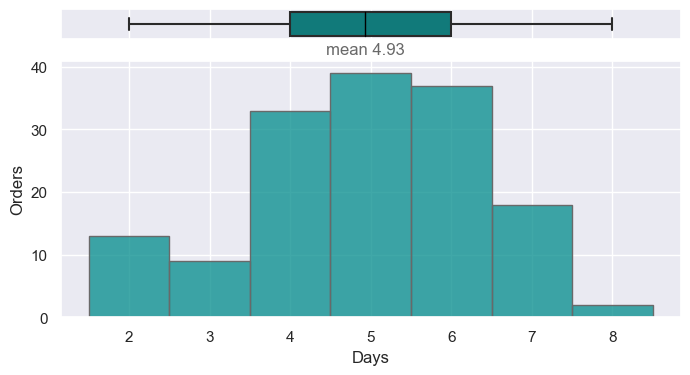

In [36]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.1,0.85)},figsize=(8,4))

sns.boxplot(x=s_kpi_intern_std,ax=ax_box,color='darkcyan',
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-'},
            medianprops={'visible': False}
            )

ax_box.text(s_kpi_intern_std.mean(),                                     
            1,
            s='mean {:.2f}'.format(s_kpi_intern_std.mean()),
            horizontalalignment='center',
            color='dimgrey'
            )

bins= np.arange(1.5,9.5,1)
sns.histplot(data=s_kpi_intern_std,
            bins=bins,
            color='darkcyan',
            ax=ax_hist,
            edgecolor='dimgray'
            )

ax_box.set(xlabel='')
plt.subplots_adjust(hspace=0.15)
plt.xlabel('Days')
plt.ylabel('Orders')
plt.show()

Express Delivery:  
We need to be careful because there are only 50 data points.

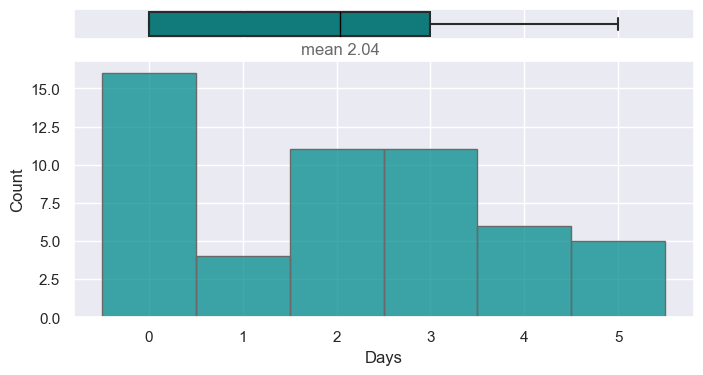

In [37]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.1,0.85)},figsize=(8,4))

sns.boxplot(x=s_kpi_intern_exp,ax=ax_box,color='darkcyan',
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-'},
            medianprops={'visible': False}
            )

ax_box.text(s_kpi_intern_exp.mean(),                                     
            1,
            s='mean {:.2f}'.format(s_kpi_intern_exp.mean()),
            horizontalalignment='center',
            color='dimgrey'
            )

bins= np.arange(-0.5,6.5,1)
sns.histplot(data=s_kpi_intern_exp,
            bins=bins,
            color='darkcyan',
            ax=ax_hist,
            edgecolor='dimgray'
            )

ax_box.set(xlabel='')
plt.subplots_adjust(hspace=0.15)
plt.xlabel('Days')
plt.show()

##### KPI External
How long does an order need between loading on the truck and it arrives at the customer.
The **2nd KPI** is `4.6 Days`

In [ ]:
df_kpi_extern = df_orders_mrg[df_orders_mrg['externcycle'].notnull()]
display(
    print('KPI 2 : '+ str(pd.to_numeric(df_kpi_extern.externcycle.dt.days,downcast='integer').mean().round(2))+ 'days'),
    pd.to_numeric(df_kpi_extern.externcycle.dt.days,downcast='integer').describe()
    )
df_kpi_extern.info()

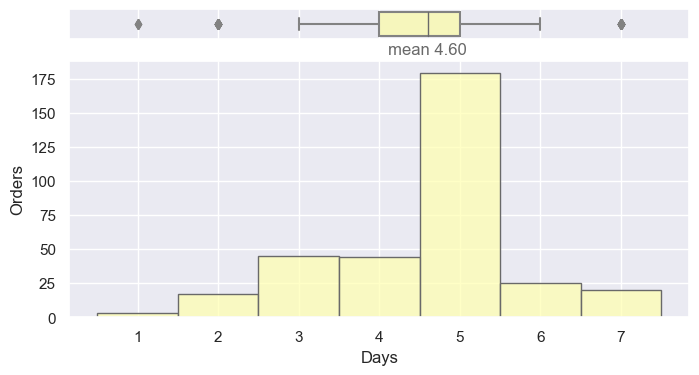

In [39]:
kpi_extern_plot = df_kpi_extern['externcycle']
kpi_extern_plot = pd.to_numeric(kpi_extern_plot.dt.days,downcast='integer')
kpi_extern_plot.reset_index(drop=True,inplace=True)

sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.1,0.85)},figsize=(8,4))

sns.boxplot(x=kpi_extern_plot,
            ax=ax_box,
            color='#ffffb3',
            showmeans=True,
            meanline=True,
            meanprops={'color': 'dimgray', 'ls': '-'},
            medianprops={'visible': False}
            )

ax_box.text(kpi_extern_plot.mean(),                                     
            1,
            s='mean {:.2f}'.format(kpi_extern_plot.mean()),
            horizontalalignment='center',
            color='dimgrey'
            )

bins= np.arange(0.5,8.5,1)
sns.histplot(data=kpi_extern_plot,
            bins=bins,
            color='#ffffb3',
            ax=ax_hist,
            edgecolor="dimgray"
            )

ax_box.set(xlabel='')
plt.subplots_adjust(hspace=0.15)
plt.xlabel('Days')
plt.ylabel('Orders')
plt.show()

In [40]:
s_kpi_extern_std = pd.concat([df_kpi_extern[df_kpi_extern['ship_mode'] == 'Second Class']['externcycle'],
                                df_kpi_extern[df_kpi_extern['ship_mode'] == 'Standard Class']['externcycle']])

s_kpi_extern_std = pd.to_numeric(s_kpi_extern_std.dt.days,downcast='integer')
s_kpi_intern_std.reset_index(inplace=True,drop=True)

s_kpi_extern_exp =df_kpi_extern[df_kpi_extern['ship_mode'] == 'First Class']['externcycle']
s_kpi_extern_exp = pd.to_numeric(s_kpi_extern_exp.dt.days,downcast='integer')
s_kpi_extern_exp.reset_index(inplace=True,drop=True)

Standard delivery:

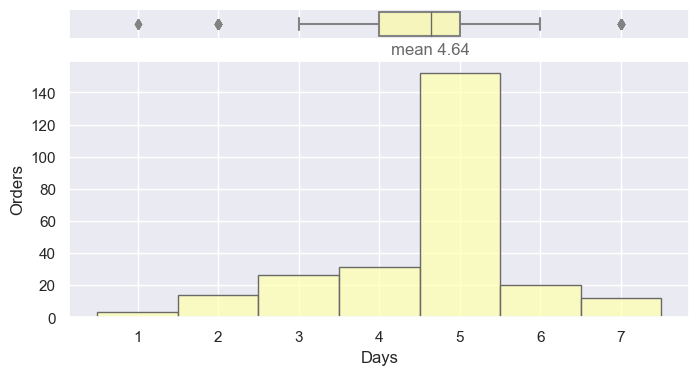

In [41]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.1,0.85)},figsize=(8,4))

sns.boxplot(x=s_kpi_extern_std,ax=ax_box,
            color='#ffffb3',
            showmeans=True,
            meanline=True,
            meanprops={'color': 'dimgray', 'ls': '-'},
            medianprops={'visible': False}
            )

ax_box.text(s_kpi_extern_std.mean(),                                     
            1,
            s='mean {:.2f}'.format(s_kpi_extern_std.mean()),
            horizontalalignment='center',
            color='dimgrey'
            )

bins= np.arange(0.5,8.5,1)
sns.histplot(data=s_kpi_extern_std,
            bins=bins,
            color='#ffffb3',
            ax=ax_hist,
            edgecolor="dimgray"
            )

ax_box.set(xlabel='')
plt.subplots_adjust(hspace=0.15)
plt.xlabel('Days')
plt.ylabel('Orders')
plt.show()

Express Delivery:

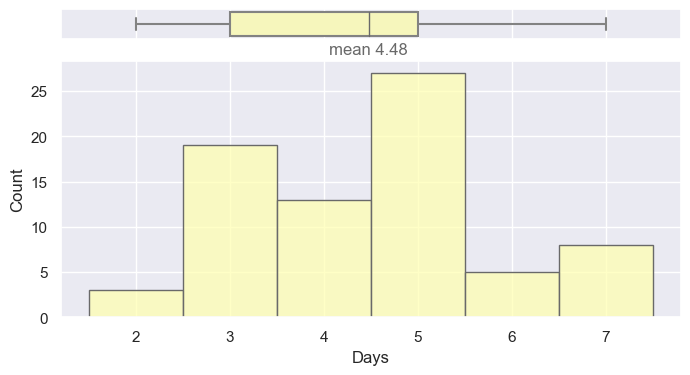

In [42]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.1,0.85)},figsize=(8,4))

sns.boxplot(x=s_kpi_extern_exp,ax=ax_box,
            color='#ffffb3',
            showmeans=True,
            meanline=True,
            meanprops={'color': 'dimgray', 'ls': '-'},
            medianprops={'visible': False}
            )

ax_box.text(s_kpi_extern_exp.mean(),
            1,
            s='mean {:.2f}'.format(s_kpi_extern_exp.mean()),
            horizontalalignment='center',
            color='dimgrey'
            )

bins= np.arange(1.5,8.5,1)
sns.histplot(data=s_kpi_extern_exp,
            bins=bins,
            color='#ffffb3',
            ax=ax_hist,
            edgecolor="dimgray"
            )

ax_box.set(xlabel='')
plt.subplots_adjust(hspace=0.15)
plt.xlabel('Days')
plt.show()

##### KPI Totallead

we calculate the **KPI3**: `10.83 days`

In [ ]:
df_kpi_total = df_orders_mrg[df_orders_mrg['totallead'].notnull()]
display(
    print('KPI 2 : '+ str(pd.to_numeric(df_kpi_total.totallead.dt.days,downcast='integer').mean().round(2))+ 'days'),
    pd.to_numeric(df_kpi_total.totallead.dt.days,downcast='integer').describe()
    )
df_kpi_extern.info()

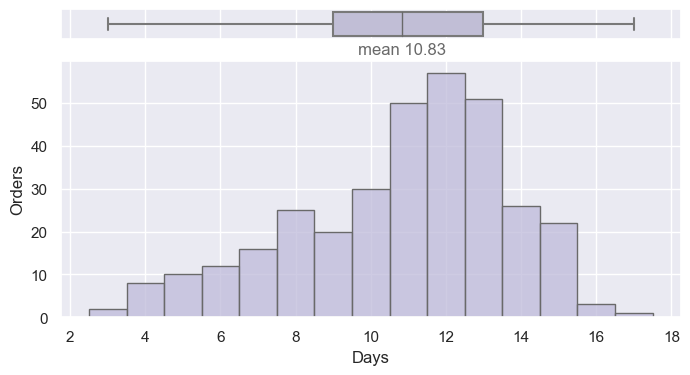

In [44]:
kpi_total_plot = df_kpi_total['totallead']
kpi_total_plot = pd.to_numeric(kpi_total_plot.dt.days,downcast='integer')
kpi_total_plot.reset_index(drop=True,inplace=True)

sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.1,0.85)},figsize=(8,4))

sns.boxplot(x=kpi_total_plot,
            ax=ax_box,
            color='#bebada',
            showmeans=True,
            meanline=True,
            meanprops={'color': 'dimgray', 'ls': '-'},
            medianprops={'visible': False}
            )

ax_box.text(kpi_total_plot.mean(),                                     
            1,
            s='mean {:.2f}'.format(kpi_total_plot.mean()),
            horizontalalignment='center',
            color='dimgrey'
            )

#ax_box.text(kpi_total_plot.quantile(0.95),                                     
#            1,
#            s='mean {:.2f}'.format(kpi_total_plot.quantile(0.95)),
#            horizontalalignment='center',
#            color='dimgrey'
#            )

bins= np.arange(2.5,18.5,1)
sns.histplot(data=kpi_total_plot,
            bins=bins,
            color='#bebada',
            ax=ax_hist,
            edgecolor="dimgray"
            )

ax_box.set(xlabel='')
plt.subplots_adjust(hspace=0.15)
plt.xlabel('Days')
plt.ylabel('Orders')
plt.show()

In [45]:
s_kpi_total_std = pd.concat([df_kpi_total[df_kpi_total['ship_mode'] == 'Second Class']['totallead'],
                                df_kpi_total[df_kpi_total['ship_mode'] == 'Standard Class']['totallead']])

s_kpi_total_std = pd.to_numeric(s_kpi_total_std.dt.days,downcast='integer')
s_kpi_total_std.reset_index(inplace=True,drop=True)

s_kpi_total_exp =df_kpi_total[df_kpi_total['ship_mode'] == 'First Class']['totallead']
s_kpi_total_exp = pd.to_numeric(s_kpi_total_exp.dt.days,downcast='integer')
s_kpi_total_exp.reset_index(inplace=True,drop=True)

Standard Delivery:

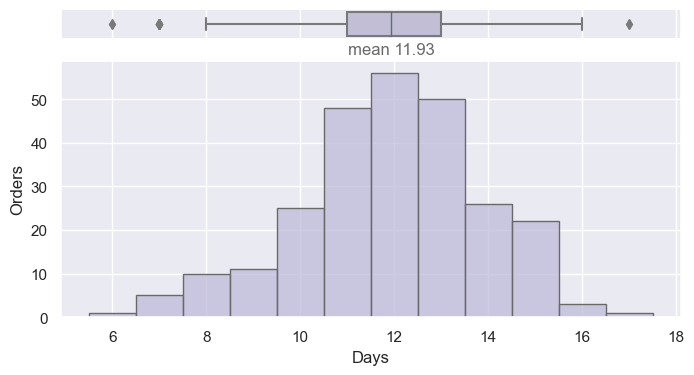

In [46]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.1,0.85)},figsize=(8,4))

sns.boxplot(x=s_kpi_total_std,ax=ax_box,
            color='#bebada',
            showmeans=True,
            meanline=True,
            meanprops={'color': 'dimgray', 'ls': '-'},
            medianprops={'visible': False}
            )

ax_box.text(s_kpi_total_std.mean(),
            1,
            s='mean {:.2f}'.format(s_kpi_total_std.mean()),
            horizontalalignment='center',
            color='dimgrey'
            )

bins= np.arange(5.5,18.5,1)
sns.histplot(data=s_kpi_total_std,
            bins=bins,
            color='#bebada',
            ax=ax_hist,
            edgecolor="dimgray"
            )
            
ax_box.set(xlabel='')
plt.subplots_adjust(hspace=0.15)
plt.xlabel('Days')
plt.ylabel('Orders')
plt.show()

Express Delivery:

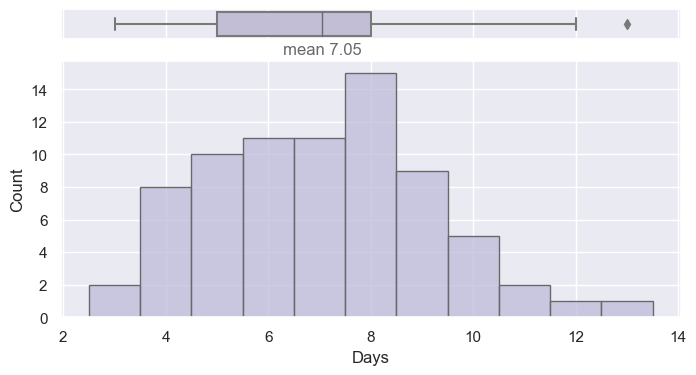

In [47]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.1,0.85)},figsize=(8,4))

sns.boxplot(x=s_kpi_total_exp,ax=ax_box,
            color='#bebada',
            showmeans=True,
            meanline=True,
            meanprops={'color': 'dimgray', 'ls': '-'},
            medianprops={'visible': False}
            )

ax_box.text(s_kpi_total_exp.mean(),
            1,
            s='mean {:.2f}'.format(s_kpi_total_exp.mean()),
            horizontalalignment='center',
            color='dimgrey'
            )

bins= np.arange(2.5,14.5,1)
sns.histplot(data=s_kpi_total_exp,
            bins=bins,
            color='#bebada',
            ax=ax_hist,
            edgecolor="dimgray"
            )

ax_box.set(xlabel='')
plt.subplots_adjust(hspace=0.15)
plt.xlabel('Days')
plt.show()

In [48]:
#display(pd.to_numeric(df_kpi_intern.interncycle.dt.days,downcast='integer').describe(),
#    pd.to_numeric(df_kpi_extern.externcycle.dt.days,downcast='integer').describe(),
#    pd.to_numeric(df_kpi_total.totallead.dt.days,downcast='integer').describe()
#    )

Extra values for KPI 3:

In [ ]:
display(
    pd.to_numeric(df_kpi_total.totallead.dt.days,downcast='integer').mean(),
    pd.to_numeric(df_kpi_total.totallead.dt.days,downcast='integer').quantile(q=0.75),
    pd.to_numeric(df_kpi_total.totallead.dt.days,downcast='integer').quantile(q=0.95)
)

All 3 together:  
put all 3 KPIs in one board.

In [50]:
df_plot = pd.concat(
    [pd.to_numeric(df_kpi_intern.interncycle.dt.days,downcast='integer'),
    pd.to_numeric(df_kpi_extern.externcycle.dt.days,downcast='integer'),
    pd.to_numeric(df_kpi_total.totallead.dt.days,downcast='integer')
    ],axis=1
)

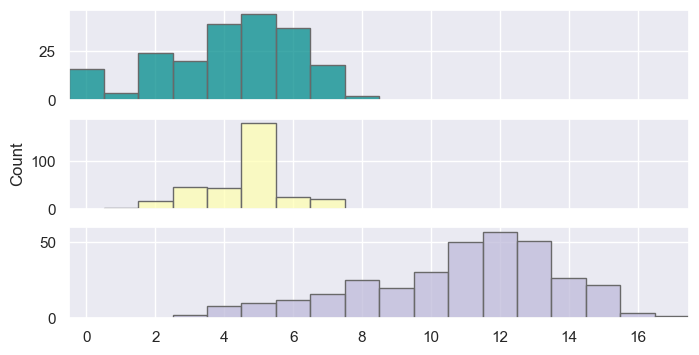

In [51]:
fig,axs = plt.subplots(3,1,figsize =(8,4),sharex=True)


axs[0].set(xlim=(-0.5,17.5))

sns.histplot(data=df_plot, x='interncycle',ax=axs[0],bins=np.arange(-0.5,9.5,1),color='darkcyan',edgecolor="dimgray")
sns.histplot(data=df_plot, x='externcycle',ax=axs[1],bins=np.arange(0.5,8.5,1),color='#ffffb3',edgecolor="dimgray")
sns.histplot(data=df_plot, x='totallead',ax=axs[2],bins=np.arange(2.5,18.5,1),color='#bebada',edgecolor="dimgray")
axs[0].set_ylabel('')
axs[2].set_ylabel('')
axs[2].set_xlabel('')
plt.show()

##### Days between warehouse and shipping
There is a difference between the addition of mean from inhouse and mean from logistic. Is there a problem, that most of the orders have a downtime between both cycles?  
Let's analyse how much is the impact, when the delivery is able to go on track right after the warehouse process is over(means express shipping)   
Values for between:

In [ ]:
df_kpi_btw = df_orders_mrg[df_orders_mrg['btwcycle'].notnull()] 
pd.to_numeric(df_kpi_btw.btwcycle.dt.days,downcast='integer').describe()

In [53]:
ser_kpi_btw_std = pd.concat([df_kpi_btw[df_kpi_btw['ship_mode'] == 'Second Class']['btwcycle'],
                                df_kpi_btw[df_kpi_btw['ship_mode'] == 'Standard Class']['btwcycle']])

ser_kpi_btw_std = pd.to_numeric(ser_kpi_btw_std.dt.days,downcast='integer')
ser_kpi_btw_std.reset_index(inplace=True,drop=True)

Standard Process:

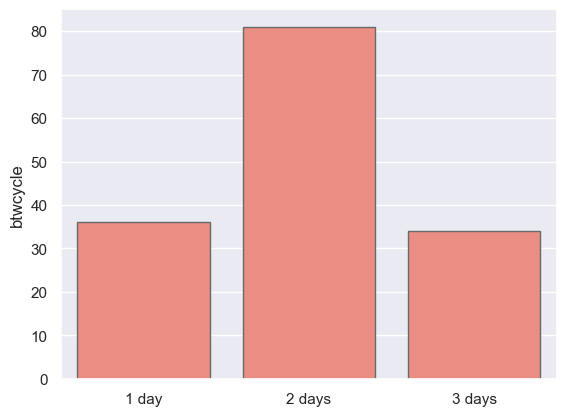

In [54]:
fig, ax = plt.subplots()

sns.barplot(x=ser_kpi_btw_std.value_counts().index,
            y=ser_kpi_btw_std.value_counts(),
            color='#fb8072',
            edgecolor="dimgray"
            )
            
ax.set_xticklabels(['1 day','2 days','3 days'])
plt.show()

Express Process:

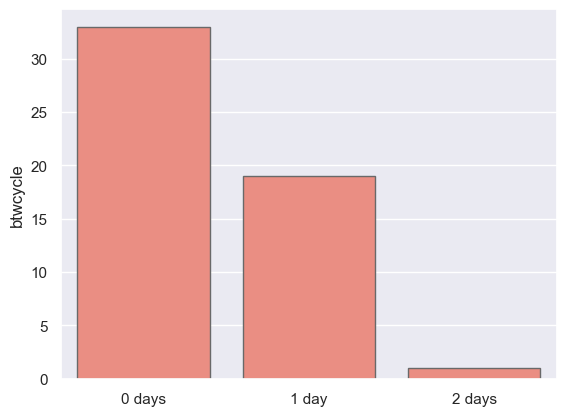

In [55]:
fig, ax = plt.subplots()

sns.barplot(x=df_kpi_btw[df_kpi_btw['ship_mode'] == 'First Class'].btwcycle.value_counts().index,
            y=df_kpi_btw[df_kpi_btw['ship_mode'] == 'First Class'].btwcycle.value_counts(),
            color='#fb8072',
            edgecolor="dimgray"
            )
            
ax.set_xticklabels(['0 days','1 day','2 days'])
plt.show()

## Evaluation on Day

We want to find out how much impact has the weekday an order comes in.  
For this we can use the intern process data, because there are `order_date` and `on_truck_scan`.

In [56]:
df_order_process['weekday_order'] = df_order_process['order_date'].dt.day_of_week
df_order_process['order_to_truck'] = df_order_process.on_truck_scan_date - df_order_process.order_date
df_order_process['order_to_truck'] =  pd.to_numeric(df_order_process.order_to_truck.dt.days,downcast='integer')

We create a crosstable for the days and the duration of an order. Afterwards we create a heatmap with this values.

In [57]:
df_day_order_duration = pd.crosstab(df_order_process.weekday_order,
                                    df_order_process.order_to_truck,
                                    normalize='index'
                                    ).round(2)
df_day_order_duration.reset_index(drop=True,inplace=True)
df_day_order_duration.set_axis(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], axis='index',inplace=True)

df_labels = df_day_order_duration.mask(df_day_order_duration <= 0.15, '')
df_labels = df_labels.apply(pd.to_numeric,errors='coerce')
df_labels.reset_index(drop=True,inplace=True)
#here was a better way hours before
annotations = df_labels.astype(str)
annotations[np.isnan(df_labels)] = ""

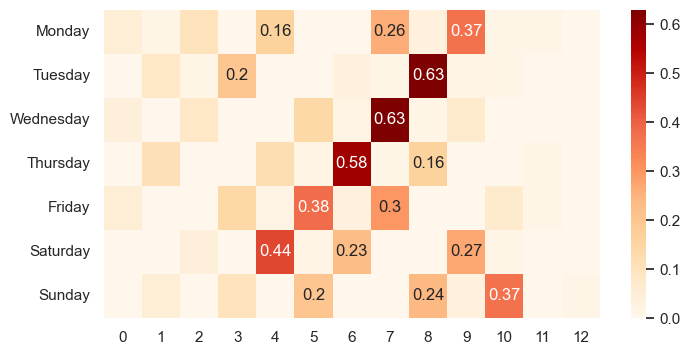

In [58]:
fig,axs = plt.subplots(1,figsize =(8,4))
sns.set(style='darkgrid')
sns.heatmap(df_day_order_duration,cmap="OrRd",annot=annotations,fmt='s') #holy **** this fmt='s' thing needed only 1.5h
axs.set_xlabel('')
plt.show()